In [2]:
#import of pandas and numpy
import pandas as pd
import numpy as np

In [47]:
#imports dataset

marketing_demo_raw_data = pd.read_csv("Datasets/marketing_demographics.csv")
# check for nan values
print(marketing_demo_raw_data.isna().values.any())

marketing_demo_raw_data


False


,ID,Education,Marital_Status,Income,Country,Age,Children
0,0,Graduation,Married,70951.0,SA,37,0
1,1,Graduation,Single,57091.0,CA,61,0
2,9,Master,Single,46098.0,CA,47,2
3,13,PhD,Widow,25358.0,SA,75,1
4,17,PhD,Married,60491.0,SP,51,1
...,...,...,...,...,...,...,...
2211,11178,Master,Single,42394.0,GER,50,1
2212,11181,PhD,Married,156924.0,CA,73,0
2213,11187,Basic,Single,26487.0,CA,44,1
2214,11188,Graduation,Together,26091.0,SP,65,2


In [48]:
#imports dataset
marketing_buss_raw_data = pd.read_csv("Datasets/marketing_business.csv")
# check for nan values
print(marketing_buss_raw_data.isna().values.any())
marketing_buss_raw_data


False


,ID,Total_Amount,Total_Purchase,Web_Purchase,Store_Purchase,Accepted_Campaigns,Website_Visit,Complaint,Response
0,1826,1190,14,4,10,0,1,0,1
1,1,577,17,7,10,1,5,0,1
2,10476,251,10,3,7,0,2,0,0
3,1386,11,3,1,2,0,7,0,0
4,5371,91,6,3,3,1,7,0,1
...,...,...,...,...,...,...,...,...,...
2211,10142,689,18,5,13,0,4,0,0
2212,5263,55,4,1,3,0,8,0,0
2213,22,309,12,6,6,0,8,0,0
2214,528,1383,19,5,14,0,3,0,0


In [49]:
#join datasets on ID
marketing_raw_data= marketing_buss_raw_data.set_index("ID").join(marketing_demo_raw_data.set_index("ID"))

# Task 1.1
Calculate the average of ’Total Amount’ and ’Total Purchase’ for each Education category. Do you
find the same category to have the highest average for both amount and purchase?
# Answer:
YES, PhD has the highest both in Amount and Purchase

In [139]:
task1_1_data = marketing_raw_data[["Total_Amount","Total_Purchase","Education"]]

In [141]:
task1_1_data.groupby("Education").mean()

,Total_Amount,Total_Purchase
Education,,
2n Cycle,494.930000,11.680000
Basic,81.796296,5.222222
Graduation,621.686380,12.695341
Master,609.767123,12.468493
PhD,676.733888,13.492723


# Task 1.2
Filter your data for countries from which there is at least 200 customers. From which country in this
filtered dataset you can find the most complaints (column Complaint)

# Answer:
SP = Spain?

In [50]:
task1_2_data = marketing_raw_data.loc[:, ("Complaint","Country")]


In [143]:
complaint_counts = task1_2_data.groupby("Country")["Complaint"].transform("count")
mask = complaint_counts >= 200
new_df = task1_2_data[mask]
print(new_df.groupby("Country")["Complaint"].sum())


Country
CA     2
SA     3
SP    14
Name: Complaint, dtype: int64


# Task 1.3
Calculate a new column that is 0, if the customer has 0 children, and 1 otherwise (so if the customer
has at least 1 child). Do customers with or without children have higher average Income? Check
whether the difference is statistically significant using a t-test!

# Answer:
People without children have an higher income.
The difference is statistically signigicant as the T value is -16.907 which indicates there is a significant difference between income without children then with children. Also as our p-test value for our null hypothesis "There is no difference between customers with or without kids" is pretty much zero, so there is strong evidence that our findings.

In [144]:
task1_3_data =  marketing_raw_data.loc[:, ("Children", "Income")]


False


In [145]:
task1_3_data["HasChildren"] = task1_3_data["Children"].apply(lambda x: 0 if x == 0 else 1)
print(task1_3_data.groupby("HasChildren")["Income"].mean())

HasChildren
0    65705.565561
1    46865.626027
Name: Income, dtype: float64


In [146]:
# t-test import scipys own t test
from scipy.stats import ttest_ind

income_with_children = task1_3_data.loc[task1_3_data["HasChildren"] == 1, "Income"]
income_without_children = task1_3_data.loc[task1_3_data["HasChildren"] == 0, "Income"]
t, p = ttest_ind(income_with_children, income_without_children)
print("t-value: ", t)
print("p-value: ", p)

t-value:  -16.9071717250489
p-value:  2.08492231266765e-60


# Task 1.4
The company believes that their main target group is the customers aged between 18 and 45 years.
To check whether it is reflected in the sales, check whether the average number of Web Purchase is
higher for the customers in the target age group than for other customers. Do you have the same
result when you use Store Purchase? (Hint: you can create a new column that is 1 when the customer
is in the target age group and 0 otherwise).

# Answer:
The not targeted group has a higher average amount of number of Web Purchases.

The not targeted group has a higher average amount of number of Store Purchases.

In [147]:
task1_4_data =  marketing_raw_data.loc[:, ("Store_Purchase","Web_Purchase", "Age")]

False


In [148]:

task1_4_data["Age_target"] = task1_4_data["Age"].apply(lambda x: 1 if 18<=x<=45 else 0)
# Web_purchase
print(task1_4_data.groupby("Age_target")["Web_Purchase"].mean())
# Store_purchase
print(task1_4_data.groupby("Age_target")["Store_Purchase"].mean())

Age_target
0    4.293317
1    3.525000
Name: Web_Purchase, dtype: float64
Age_target
0    8.762995
1    7.688333
Name: Store_Purchase, dtype: float64


# Task 1.5
Calculate the correlation between the columns Total Purchase, Age, and Income. Which of the
other two variables seem to be more related to Total Purchase? Based on this and the previous
question, do you think it would be useful for the company to focus a lot of efforts on age-based
segmentation/marketing?
# Answer:
Income and Total_Purchase has a moderate positiv correlation while Age and Total_Purchases has only a very week positiv correlation. So I would not focus my efforts on age-based marketing. 


In [166]:
task1_5_data =  marketing_raw_data.loc[:, ("Total_Purchase","Age", "Income")]


False


In [167]:
print(task1_5_data.corr())


                Total_Purchase       Age    Income
Total_Purchase        1.000000  0.165397  0.625755
Age                   0.165397  1.000000  0.161791
Income                0.625755  0.161791  1.000000


# Task 2.1
Visualization: create 6 plots of your choice based on the data and explain what information you
gain from them; the plots can be histograms, boxplots etc. You need to create some univariate and
multivariate plots, and focus mainly on the ’Churn’ column. The created visuals should address at
least the following issues : (i) relationship between Churn and having international or voice mail plan
in the subscription; (ii) total minutes/calls/charge during different parts of the day and Churn (you
may also want to create a column that has these values for the whole day, i.e., the sum of day, eve
and night minutes/calls/charges); (iii) relationship between international calls/charge and Churn;
(iv) relationship between Customer service calls and Churn.


In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Datasets/churn-bigml-80.csv")

#check for null and nan values
print(data.isnull().sum().any())
print(data.isna().values.any())

False
False


In [199]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


# Task 2.1.1
(i) relationship between Churn and having international or voice mail plan in the subscription
# Answer:
Used a basic bar plot to show the relationship, as we can see those who have a international plan are more likly to have canceled their subscription. 

Those with the voice mail plan are less likly to have canceled their plan then people without any plan.

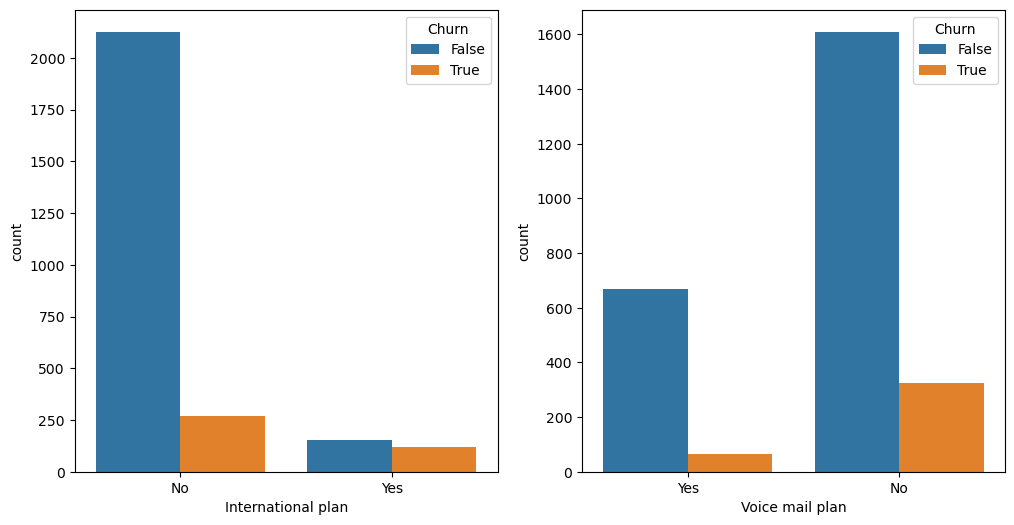

In [208]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x="International plan", hue="Churn", data=data, ax=ax[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=data, ax=ax[1])
plt.show()

 # Task 2.1.2
(ii) total minutes/calls/charge during different parts of the day and Churn (you may also want to create a column that has these values for the whole day, i.e., the sum of day, eve and night minutes/calls/charges);
# Answer:


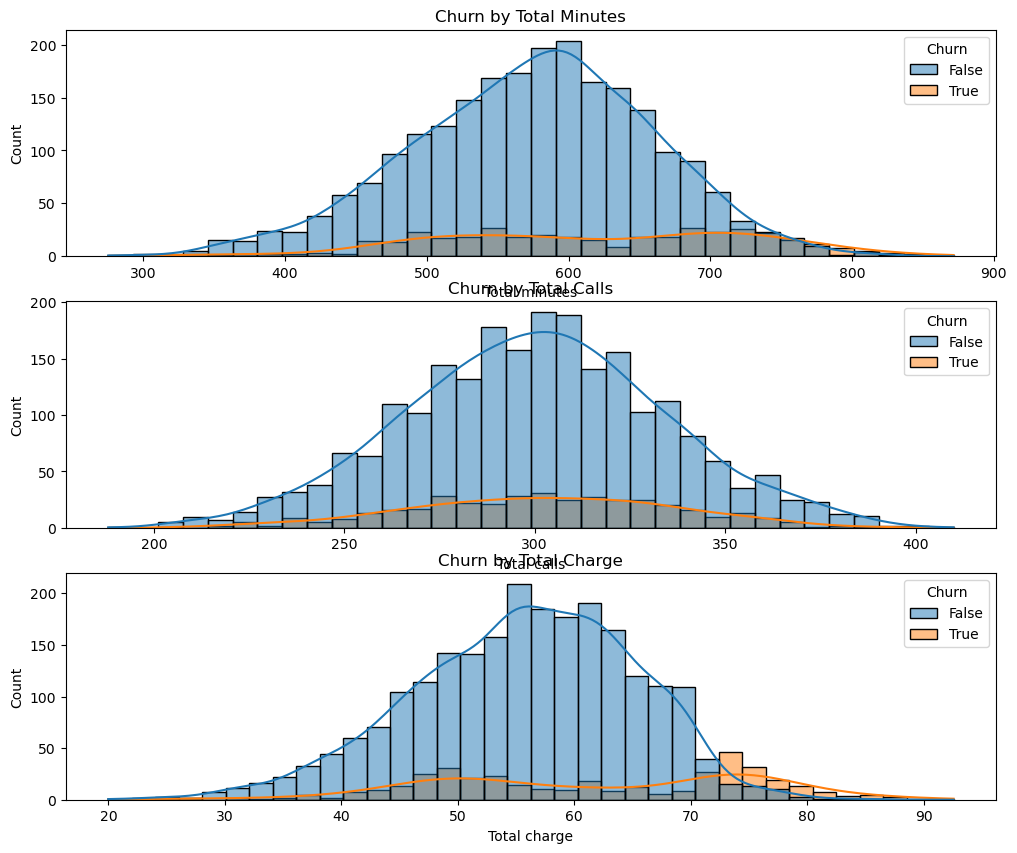

In [183]:
data["Total minutes"] = data["Total day minutes"] + data["Total eve minutes"] + data["Total night minutes"]
data["Total calls"] = data["Total day calls"] + data["Total eve calls"] + data["Total night calls"]
data["Total charge"] = data["Total day charge"] + data["Total eve charge"] + data["Total night charge"]
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
sns.histplot(x="Total minutes", hue="Churn", data=data, kde=True, ax=ax[0])
sns.histplot(x='Total calls', hue="Churn", data=data, kde=True, ax=ax[1])
sns.histplot(x="Total charge", hue="Churn", data=data, kde=True, ax=ax[2])
ax[0].set_title("Churn by Total Minutes")
ax[1].set_title("Churn by Total Calls")
ax[2].set_title("Churn by Total Charge")
plt.show()

# Task 2.1.3
(iii) relationship between international calls/charge and Churn;

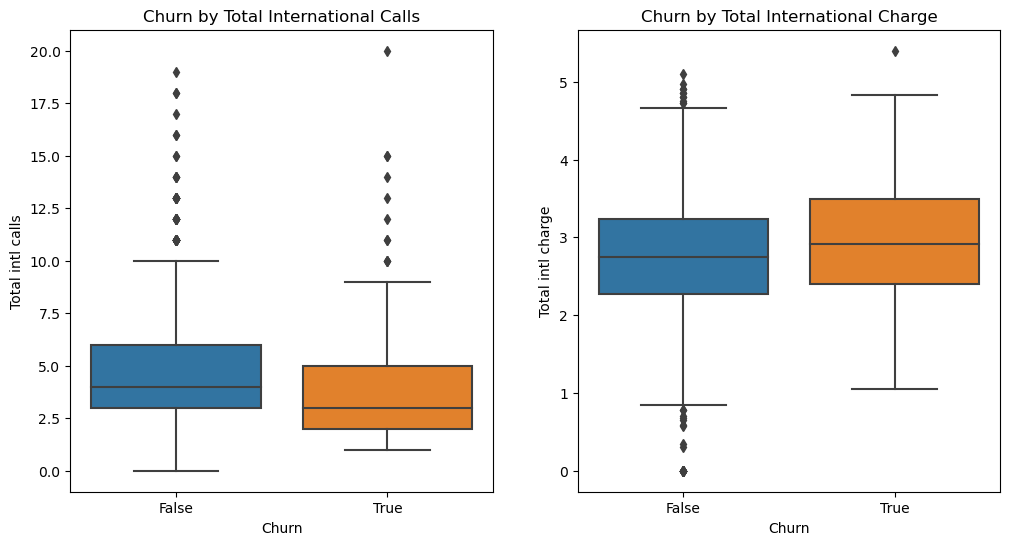

In [184]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x="Churn", y="Total intl calls", data=data, ax=ax[0])
sns.boxplot(x="Churn", y="Total intl charge", data=data, ax=ax[1])
ax[0].set_title("Churn by Total International Calls")
ax[1].set_title("Churn by Total International Charge")
plt.show()

# Task 2.1.4 
(iv) relationship between Customer service calls and Churn.

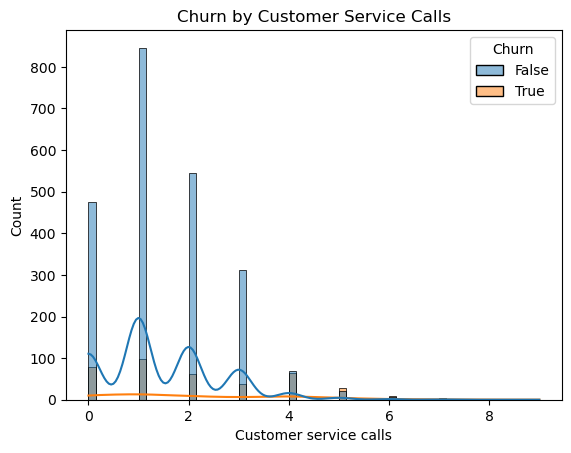

In [185]:
sns.histplot(x="Customer service calls", hue="Churn", data=data, kde=True)
plt.title("Churn by Customer Service Calls")
plt.show()

# Task 2.2
Descriptive statistics: You are free to explore the data with any of the tools we used in the course
to understand the relationship between Churn and other data available about customers. You need
to at least address the issues mentioned in the visual analysis part. Note that, as ’Churn’ has two
possible values, you want to use either cross-tabulation (to compare with other categorical variables)
or groupby and aggregation (to compare with numeric variables).
# Answer:


# Task 3
In this exercise, you will have to work with the World Happiness Report dataset (’happiness.csv’; when importing, use sep = ’;’). The main Score asks respondents to think of a ladder with the
best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives
on that scale. The other columns estimate the extent to which each of six factors – economic production,
social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life
evaluations higher in each country. In the following you have to perform some data preparation tasks;
this time, in each task use the data that you obtain after performing the previous steps (so in the end you
will obtain a dataframe that is modified according to all the specifications)


In [190]:
# import data
happiness_df = pd.read_csv("Datasets/happiness.csv", sep=';')
happiness_df.sort_values(by="Healthy life expectancy", ascending=True)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093
131,132,Chad,4.350,0.350,0.766,0.192,0.174,0.198,0.078
98,99,Ivory Coast,4.944,0.569,0.808,0.232,0.352,0.154,0.090
128,129,Sierra Leone,4.374,0.268,0.841,0.242,0.309,0.252,0.045
...,...,...,...,...,...,...,...,...,...
122,123,Mozambique,4.466,0.204,NaN,NaN,NaN,0.197,0.138
133,134,Ethiopia,4.286,0.336,1.033,NaN,0.344,NaN,0.100
135,136,Uganda,4.189,0.332,1.069,NaN,0.356,NaN,0.060
145,146,Zimbabwe,3.663,0.366,NaN,NaN,0.361,NaN,0.089


# Task 3.1
Remove outliers: (i) for the column ’Healthy life expectancy’, remove the top 3% of values, and (ii)
for column ’Perceptions of corruption’, remove the bottom 2%

In [191]:
healthy_number = happiness_df["Healthy life expectancy"].quantile(0.97)
corruption_number = happiness_df["Perceptions of corruption"].quantile(0.02)

# remove top 3% (i)
happiness_df = happiness_df[happiness_df["Healthy life expectancy"] < healthy_number]

# remove bottom 2% (ii)
happiness_df = happiness_df[happiness_df["Perceptions of corruption"] >corruption_number]
happiness_df


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,NaN,0.361,0.000,0.158,0.025


# Task 3.2
Handle missing values: (i) remove countries (rows) where there are 3 or more missing values; (ii) fill
in the rest of the missing values with the mean value of their column

In [192]:
# If I understand correctly i should continue working with data from 3.1
happiness_df = happiness_df.dropna(thresh = 7)
happiness_df


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,NaN,0.361,0.000,0.158,0.025


In [193]:
# fill the missing values with mean

# got a depricated warning from 
# happiness_df = happiness_df.fillna(happiness_df.mean())
# so gonna select only numerical columns and do it again
num_cols =  happiness_df.select_dtypes(include=np.number).columns
happiness_df[num_cols] = happiness_df[num_cols].fillna(happiness_df[num_cols].mean())

# check for na
print(happiness_df.isna().values.any())

False


# Task 3.3
Create a categorical version of ’GDP per capita’ column with four categories and corresponding
labels (keep also the original column): (i) below 0.58, ’Low’, (ii) between 0.58 and 0.96, ’Average’,
(iii) between 0.96 and 1.23, ’High’, and (iv) above 1.23, ’Very High’.


In [194]:
import sys
maximum = sys.maxsize - 1
GDP_bins = [-0.0001,0.58,0.96,1.23, maximum]
GDP_labels = ["Low", "Average", "High", "Very High"]
happiness_df['GDP_bins'] = pd.cut(happiness_df["GDP per capita"], bins=GDP_bins, labels=GDP_labels)


# Task 3.4
Scale all the numeric columns using the StandardScaler transformation

In [195]:
from sklearn.preprocessing import StandardScaler
print(happiness_df.dtypes)


Overall rank                       int64
Country or region                 object
Score                            float64
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
GDP_bins                        category
dtype: object


In [196]:
scaler = StandardScaler()
num_cols = happiness_df.select_dtypes(include=np.number).columns
num_cols

Index(['Overall rank', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [197]:

# fit the data
scaler.fit(happiness_df[num_cols])
# transofrm the data using the fitted scaler
scaled_values = scaler.transform(happiness_df[num_cols])

# finally make new columns for the fitted scales and add the dataframe
for i, col in enumerate(num_cols):
    happiness_df[f"{col}_scaled"] = scaled_values[:, i]
happiness_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP_bins,Overall rank_scaled,Score_scaled,GDP per capita_scaled,Social support_scaled,Healthy life expectancy_scaled,Freedom to make life choices_scaled,Generosity_scaled,Perceptions of corruption_scaled
0,1,Finland,7.769,1.340,1.587000,0.986,0.596,0.153,0.393,Very High,-1.748302,2.140997,1.148248,1.342788,1.151740,1.453439,-0.309986,3.196855
1,2,Denmark,7.600,1.383,1.573000,0.996,0.592,0.252,0.410,Very High,-1.726228,1.990011,1.259132,1.293840,1.194164,1.425610,0.704912,3.388111
2,3,Norway,7.554,1.488,1.582000,1.028,0.603,0.271,0.341,Very High,-1.704154,1.948915,1.529894,1.325307,1.329918,1.502139,0.899691,2.611834
3,4,Iceland,7.494,1.380,1.624000,1.026,0.591,0.354,0.118,Very High,-1.682080,1.895311,1.251396,1.472153,1.321433,1.418653,1.750565,0.102998
4,5,Netherlands,7.488,1.396,1.522000,0.999,0.557,0.322,0.298,Very High,-1.660006,1.889950,1.292655,1.115526,1.206891,1.182109,1.422517,2.128068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,Yemen,3.380,0.287,1.163000,0.463,0.143,0.108,0.077,Low,1.562811,-1.780152,-1.567113,-0.139658,-1.066993,-1.698165,-0.771303,-0.358268
151,152,Rwanda,3.334,0.359,0.711000,0.614,0.555,0.217,0.411,Low,1.584885,-1.821248,-1.381447,-1.720001,-0.426402,1.168194,0.346110,3.399362
152,153,Tanzania,3.231,0.476,0.885000,0.499,0.417,0.276,0.147,Low,1.606960,-1.913269,-1.079740,-1.111639,-0.914269,0.208103,0.950948,0.429259
153,154,Afghanistan,3.203,0.350,1.202944,0.361,0.000,0.158,0.025,Low,1.629034,-1.938284,-1.404655,0.000000,-1.499709,-2.693042,-0.258728,-0.943288
